# Cuantización de Colores con K Means

REDUCIR UNA IMAGEN, PARA RESALTAR CIERTAS COSAS QUE NO SE RESALTEN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Recuperar la imagen

In [2]:
imagen_arreglo = mpimg.imread('palm_trees.jpg')

In [3]:
# Imagen de 1401 píxeles de alto
# con 934 píxeles de ancho y
# 3 canales (R G B) (Rojo Verde Azúl)
imagen_arreglo.shape

(1401, 934, 3)

In [4]:
#Pixel(0,0)
imagen_arreglo[0][0]

array([ 25,  89, 127], dtype=uint8)

In [5]:
#Pixel(1400,933)
imagen_arreglo[1400][933]

array([10, 10, 12], dtype=uint8)

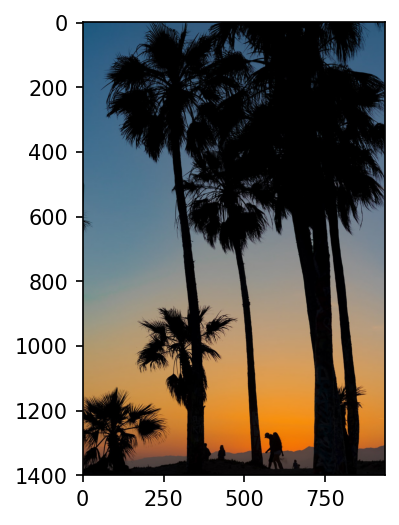

In [6]:
plt.figure(figsize=(5,4),dpi=150)
plt.imshow(imagen_arreglo)

### Uso de K Means para la Cuantización de colores
Significa reducir el número de colores únicos a una cantidad de K colores. Para el ejemplo tomaremos un K = 5

In [7]:
# al = alto
# an = ancho
# ca = canales
(al,an,ca) = imagen_arreglo.shape

Conversión de la dimensión de la matriz de imagen de 3d a 2d usando (al,an,ca) --> (h*w,c)

In [8]:
imagen_arreglo_2d = imagen_arreglo.reshape(al*an,ca)

In [10]:
#PIXEL 0
imagen_arreglo_2d[0]

array([ 25,  89, 127], dtype=uint8)

In [11]:
#PIXEL 1308533
imagen_arreglo_2d[1308533]

array([10, 10, 12], dtype=uint8)

In [12]:
# Se tiene 1 308 534 píxeles
imagen_arreglo_2d.shape

(1308534, 3)

In [13]:
from sklearn.cluster import KMeans

In [14]:
modelo = KMeans(n_clusters=3)

In [16]:
modelo.fit(imagen_arreglo_2d)

KMeans(n_clusters=3)

In [17]:
etiquetas = modelo.predict(imagen_arreglo_2d)

In [18]:
etiquetas

array([1, 1, 1, ..., 0, 0, 0])

In [19]:
# Centroides del modelo (Colores)
modelo.cluster_centers_

array([[  4.91015889,   4.71990695,   5.93855143],
       [ 95.64748253, 117.80102561, 133.36636265],
       [197.0367807 , 146.72526942,  90.01734245]])

In [20]:
codigos_rgb = modelo.cluster_centers_.round(0).astype(int)

In [21]:
codigos_rgb

array([[  5,   5,   6],
       [ 96, 118, 133],
       [197, 147,  90]])

In [25]:
codigos_rgb[etiquetas]

array([[ 96, 118, 133],
       [ 96, 118, 133],
       [ 96, 118, 133],
       ...,
       [  5,   5,   6],
       [  5,   5,   6],
       [  5,   5,   6]])

In [22]:
nueva_imagen = np.reshape(codigos_rgb[etiquetas],(al,an,ca))

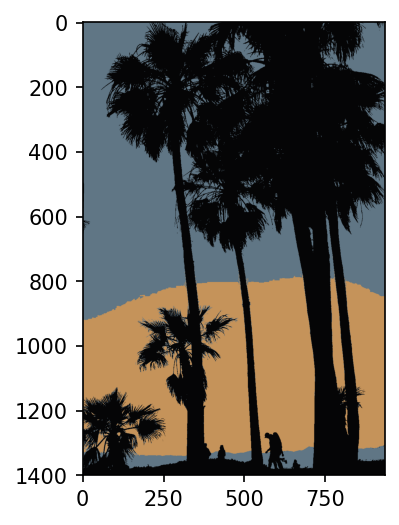

In [24]:
plt.figure(figsize=(5,4),dpi=150)
plt.imshow(nueva_imagen)

In [26]:
plt.imsave("nueva_imagen.jpg",np.uint8(nueva_imagen))